In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline 

## Software and package versions

In [2]:
print("*** VERSIONS ***")

import sys
print("Python {}".format(sys.version))
print("OpenCV {}".format(cv2.__version__))
print("Numpy {}".format(np.__version__))
import matplotlib
print("Matplotlib {}".format(matplotlib.__version__))

*** VERSIONS ***
Python 3.5.4 |Anaconda, Inc.| (default, Nov  8 2017, 18:11:28) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
OpenCV 3.3.1
Numpy 1.14.0
Matplotlib 2.1.1


In [3]:
!jupyter --version

4.3.0


In [4]:
!conda env list

# conda environments:
#
base                  *  /Users/nordin/anaconda3
py35opencv               /Users/nordin/anaconda3/envs/py35opencv
py36folium               /Users/nordin/anaconda3/envs/py36folium
spectrumflaskapp         /Users/nordin/anaconda3/envs/spectrumflaskapp



In [5]:
!conda list -n py35opencv

# packages in environment at /Users/nordin/anaconda3/envs/py35opencv:
#
# Name                    Version                   Build  Channel
_nb_ext_conf              0.4.0                    py35_1  
anaconda-client           1.6.6            py35h6008c02_0  
appnope                   0.1.0            py35hd172556_0  
asn1crypto                0.24.0                   py35_0  
bleach                    2.1.2                    py35_0  
bzip2                     1.0.6                h649919c_2  
ca-certificates           2017.08.26           ha1e5d58_0  
cairo                     1.14.10              h913ea44_6  
certifi                   2018.1.18                py35_0  
cffi                      1.11.4           py35h342bebf_0  
chardet                   3.0.4            py35h16a84c2_1  
clyent                    1.2.2            py35h63ae3d7_0  
cryptography              2.1.4            py35hbbb57dc_0  
cycler                    0.10.0           py35hb89929e_0  
decorator            

In [6]:
def print_position_in_video(cap):
    print("    position-ms: {}".format(cap.get(cv2.CAP_PROP_POS_MSEC)))
    print("position-frames: {}".format(cap.get(cv2.CAP_PROP_POS_FRAMES)))
    print(" position-ratio: {}".format(cap.get(cv2.CAP_PROP_POS_AVI_RATIO)))  
    
def print_video_info(cap):
    print("          width: {}".format(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
    print("         height: {}".format(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    # print("     fps: {}".format(cap.get(cv2.CAP_PROP_FRAME_FPS))) # This property name doesn't exist
    print("       # frames: {}".format(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
    print("           gain: {}".format(cap.get(cv2.CAP_PROP_GAIN)))
    print("     brightness: {}".format(cap.get(cv2.CAP_PROP_BRIGHTNESS)))
    print_position_in_video(cap)

## Grab first frame and plot

True
          width: 720.0
         height: 1280.0
       # frames: 465.0
           gain: 0.0
     brightness: 0.0
    position-ms: 0.0
position-frames: 0.0
 position-ratio: 3.3333333333333335e-05
    position-ms: 33.333333333333336
position-frames: 1.0
 position-ratio: 3.3333333333333335e-05


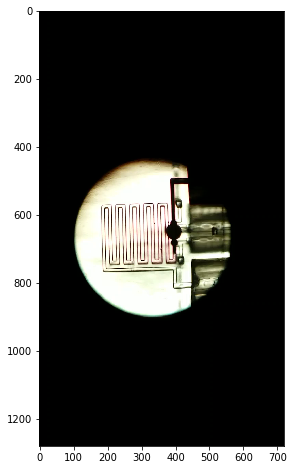

In [7]:
cap = cv2.VideoCapture('vacuum - 100 ms.mp4')
print(cap.isOpened())
print_video_info(cap)

ret, image = cap.read()
print_position_in_video(cap)
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(image[:, :, ::-1]);

## Grab particular frame, convert to grayscale, and plot

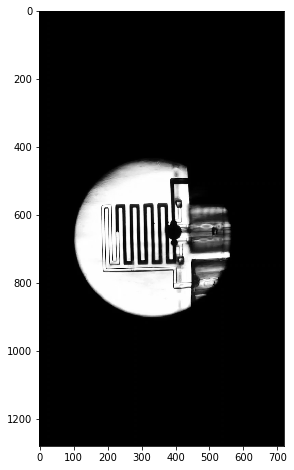

In [8]:
# Set frame pointer to particular frame
frame_num = 300
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

ret, img = cap.read()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(img_gray, cmap='gray');

In [9]:
print(img_gray.shape)
print(img_gray.min(), img_gray.max())

(1280, 720)
0 255


## Define region of interest and plot just that region

In [10]:
def add_box_to_image(img, xlow, ylow, xsize, ysize, linewidth=5, graylevel=128):
    xhigh = xlow + xsize
    yhigh = ylow + ysize
    img[:, xlow:xlow+linewidth] = graylevel
    img[:, xhigh:xhigh+linewidth] = graylevel
    img[ylow:ylow+linewidth, :] = graylevel
    img[yhigh:yhigh+linewidth, :] = graylevel

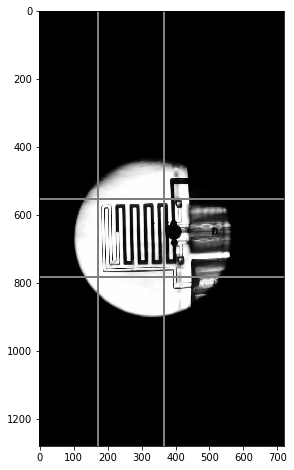

In [11]:
xlow, xsize = 170, 195
ylow, ysize = 550, 230

temp_img = img_gray.copy()
add_box_to_image(temp_img, xlow, ylow, xsize, ysize)

fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(temp_img, cmap='gray');

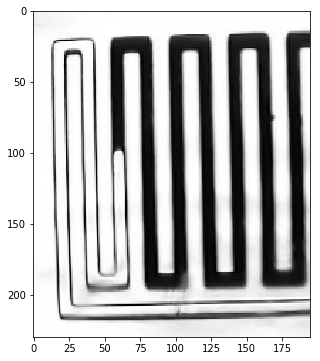

In [12]:
temp_img = img_gray.copy()
roi = np.s_[ylow:ylow+ysize, xlow:xlow+xsize]

fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(temp_img[roi], cmap='gray');

## Threshold image region of interest and count pixels below threshold

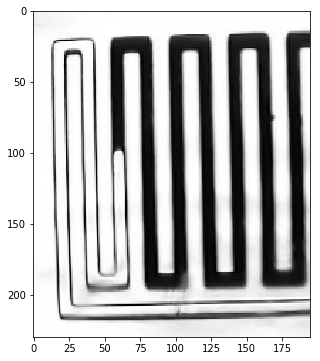

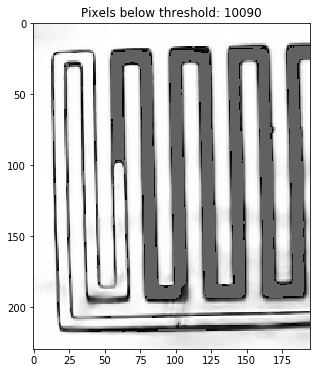

In [13]:
threshold = 50
replacement_value = 128

temp_img = img_gray.copy()
roi = np.s_[ylow:ylow+ysize, xlow:xlow+xsize]
temp_img_roi = temp_img[roi]

fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(temp_img_roi, cmap='gray');

temp = temp_img_roi.copy()
num_pixels_below_threshold = (temp < threshold).sum()
temp[temp < threshold] = replacement_value

fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(temp, cmap='gray')
ax.set_title("Pixels below threshold: {}".format(num_pixels_below_threshold));

## Process entire video

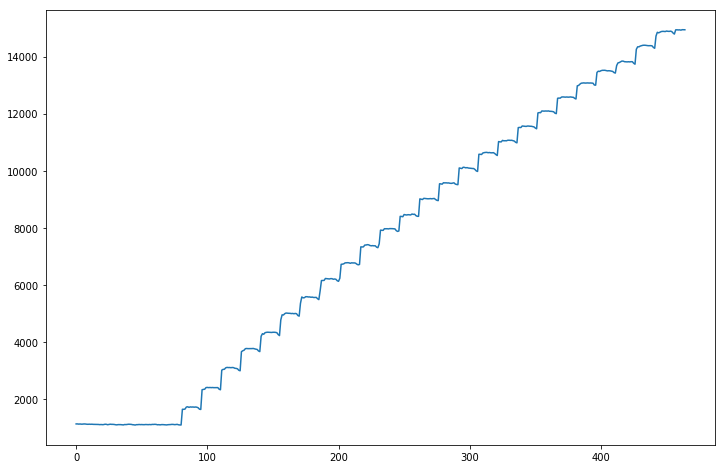

In [14]:
# Re-set frame pointer to start of video file
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
num_pixels_below_threshold = np.zeros(num_frames)

xlow, xsize = 170, 195
ylow, ysize = 550, 230
roi = np.s_[ylow:ylow+ysize, xlow:xlow+xsize]

threshold = 50

for i in range(num_frames):
    ret, img = cap.read()
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray_roi = img_gray[roi]
    num_pixels_below_threshold[i] = (img_gray_roi < threshold).sum()

frames = np.arange(num_frames)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(frames, num_pixels_below_threshold);

## Subtract average of initial black pixels

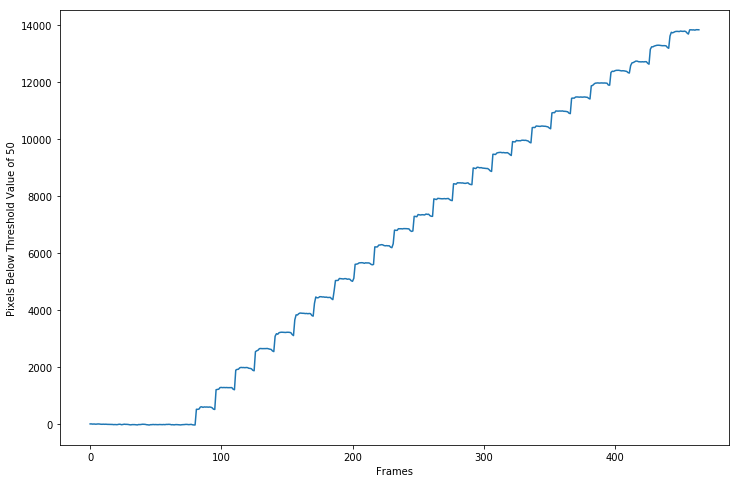

In [15]:
num_pixels_below_threshold_zeroed = num_pixels_below_threshold - np.mean(num_pixels_below_threshold[:70])

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(frames, num_pixels_below_threshold_zeroed)
ax.set_xlabel("Frames")
ax.set_ylabel("Pixels Below Threshold Value of {}".format(threshold));

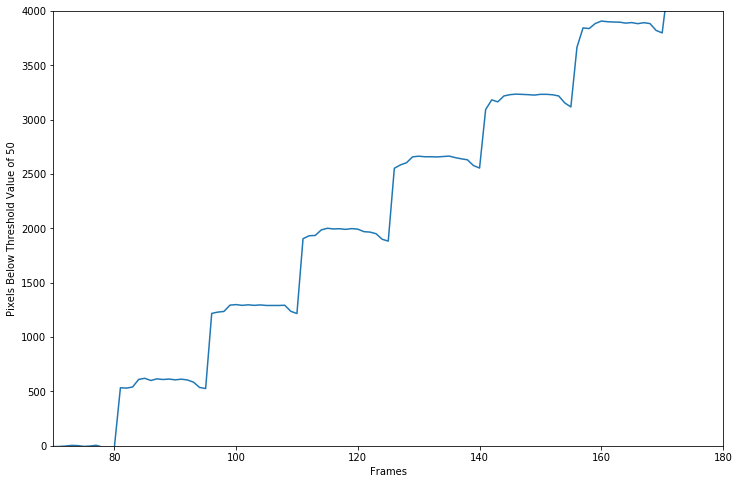

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(frames, num_pixels_below_threshold_zeroed)
ax.set_xlim(70, 180)
ax.set_ylim(0, 4000)
ax.set_xlabel("Frames")
ax.set_ylabel("Pixels Below Threshold Value of {}".format(threshold));

## Automatically find periods

In [17]:
from scipy.signal import argrelextrema

In [18]:
minima = argrelextrema(num_pixels_below_threshold_zeroed, np.less, order=5)
minima = minima[0]

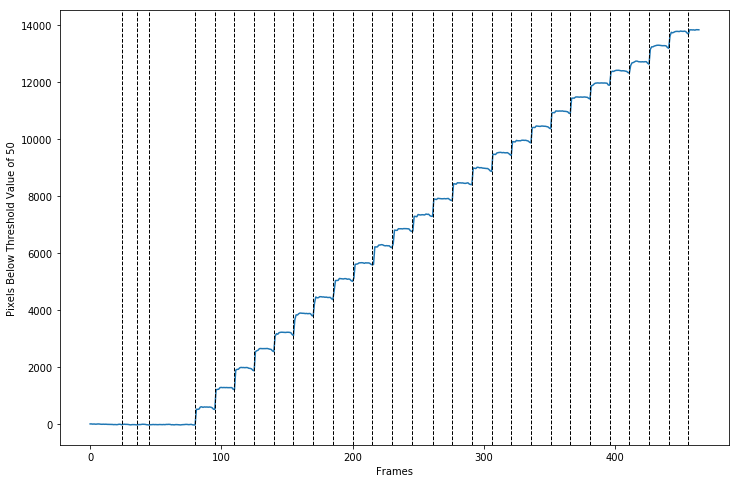

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(frames, num_pixels_below_threshold_zeroed)
for val in minima:
    ax.axvline(val, c='k', ls='--', lw=1);
ax.set_xlabel("Frames")
ax.set_ylabel("Pixels Below Threshold Value of {}".format(threshold));

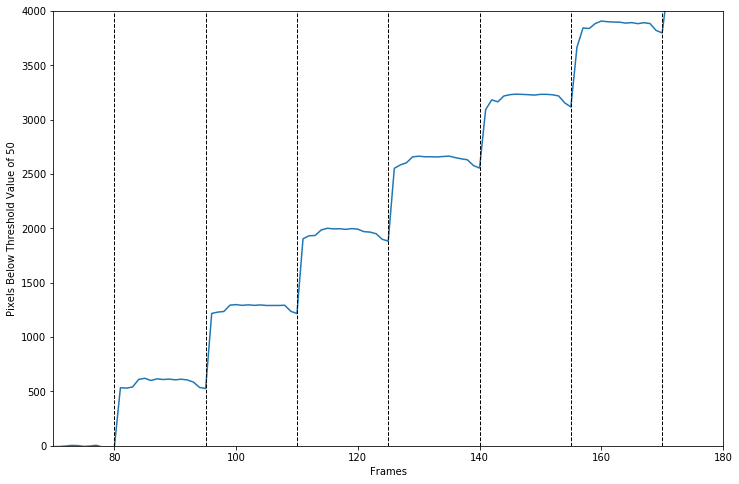

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(frames, num_pixels_below_threshold_zeroed)
ax.set_xlim(70, 180)
ax.set_ylim(0, 4000)
for val in minima:
    ax.axvline(val, c='k', ls='--', lw=1);
ax.set_xlabel("Frames")
ax.set_ylabel("Pixels Below Threshold Value of {}".format(threshold));

In [21]:
for i in range(3, 3+20):
    print(i, minima[i+1] - minima[i])

3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 16
15 15
16 15
17 15
18 15
19 15
20 15
21 15
22 15


It looks like the pump period in units of frames is very steady at 15 frames.

**I suggest just using the first 5 or so periods in your analysis to keep everything consistent because then you are guaranteed that the fluid is flowing through the serpentine and not the final straight section of channel.**